In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#Read in data set
data = pd.read_csv("Resources/final_data.csv")
data.head()

,City,State,Latitude,Longitude,01_Avg,02_Avg,03_Avg,04_Avg,05_Avg,06_Avg,...,Nov_temp,Nov_precip,Nov_humid,Nov_cloud,Dec_temp,Dec_precip,Dec_humid,Dec_cloud,Region4,Region9
0,New York,New York,40.712775,-74.005973,4251,3548,3977,3818,4037,4330,...,46.2,2.8,66.21,7.5,39.6,3.7,68.37,3.1,Northeast,Middle Atlantic
1,Buffalo,New York,42.886447,-78.878369,207,179,160,159,191,170,...,36.9,4.0,59.90,28.1,33.2,3.7,62.94,26.2,Northeast,Middle Atlantic
2,Yonkers,New York,40.931210,-73.898747,59,59,58,53,60,71,...,45.6,3.0,60.94,49.8,37.5,4.7,62.89,56.6,Northeast,Middle Atlantic
3,Albany,New York,42.652579,-73.756232,54,51,66,62,70,78,...,37.8,3.4,65.85,76.6,29.5,3.3,68.30,74.4,Northeast,Middle Atlantic
4,New Rochelle,New York,40.911488,-73.782355,31,27,31,27,30,39,...,44.3,4.4,62.27,40.0,37.0,4.9,63.37,38.5,Northeast,Middle Atlantic


In [3]:
#Average weather statistics by month in total
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
total_sums = []

for month in months:
    mo_sum = data[f"{month}_Avg"].sum()
    total_sums.append(mo_sum)          

In [4]:
#Home sales counts by month in total
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
total_temp = []
total_humid = []
total_precip = []
total_cloud = []

for month in months:
    mo_temp = round(data[f"{month}_temp"].mean(),2)
    total_temp.append(mo_temp)
    mo_humid = round(data[f"{month}_humid"].mean(),2)
    total_humid.append(mo_humid)
    mo_precip = round(data[f"{month}_precip"].mean(),2)
    total_precip.append(mo_precip)
    mo_cloud = round(data[f"{month}_cloud"].mean(),2)
    total_cloud.append(mo_cloud)    

In [5]:
#Correlations - Total
print("For the Total US:")
print("------------------------")
tot_st_corr = st.pearsonr(total_sums, total_temp)
print(f"The correlation between home sales and temperature is {round(tot_st_corr[0],2)}")
tot_sh_corr = st.pearsonr(total_sums, total_humid)
print(f"The correlation between home sales and humidity is {round(tot_sh_corr[0],2)}")
tot_sp_corr = st.pearsonr(total_sums, total_precip)
print(f"The correlation between home sales and precipitation is {round(tot_sp_corr[0],2)}")
tot_sc_corr = st.pearsonr(total_sums, total_cloud)
print(f"The correlation between home sales and cloud cover is {round(tot_sc_corr[0],2)}")

For the Total US:
------------------------
The correlation between home sales and temperature is 0.84
The correlation between home sales and humidity is -0.62
The correlation between home sales and precipitation is 0.6
The correlation between home sales and cloud cover is -0.64


In [6]:
r4_sums = data.groupby("Region4").agg({"01_Avg":['sum'], "02_Avg":['sum'], "03_Avg":['sum'],
                                      "04_Avg":['sum'], "05_Avg":['sum'], "06_Avg":['sum'],
                                      "07_Avg":['sum'], "08_Avg":['sum'], "09_Avg":['sum'],
                                      "10_Avg":['sum'], "11_Avg":['sum'], "12_Avg":['sum']})
r4_sums

,01_Avg,02_Avg,03_Avg,04_Avg,05_Avg,06_Avg,07_Avg,08_Avg,09_Avg,10_Avg,11_Avg,12_Avg
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Region4,,,,,,,,,,,,
Midwest,22675,20652,28404,30423,37042,39502,37826,37914,31400,33231,28323,27460
Northeast,12251,10188,12604,12815,14736,15655,15815,16453,13682,14594,13139,13310
South,53753,54821,72608,74224,84324,83518,79852,80548,65349,70030,61361,65168
West,42924,43780,58574,59797,67868,68252,64761,65879,55480,58377,51053,50306


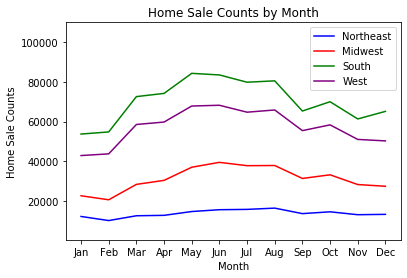

In [39]:
MW_sums = r4_sums.iloc[0,:]
NE_sums = r4_sums.iloc[1,:]
SO_sums = r4_sums.iloc[2,:]
WE_sums = r4_sums.iloc[3,:]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, NE_sums, color="blue", label="Northeast")
plt.plot(months, MW_sums, color="red", label="Midwest")
plt.plot(months, SO_sums, color="green", label="South")
plt.plot(months, WE_sums, color="purple", label="West")
plt.legend(loc="best")

plt.xlabel("Month")
plt.ylabel("Home Sale Counts")
plt.title("Home Sale Counts by Month")
plt.ylim(500, 110000)
plt.savefig("HS_cnts_mo.png")
plt.show()

In [11]:
r4_mean_temps = data.groupby("Region4").agg({"Jan_temp":['mean'], "Feb_temp":['mean'], "Mar_temp":['mean'],
                                      "Apr_temp":['mean'], "May_temp":['mean'], "Jun_temp":['mean'],
                                      "Jul_temp":['mean'], "Aug_temp":['mean'], "Sep_temp":['mean'],
                                      "Oct_temp":['mean'], "Nov_temp":['mean'], "Dec_temp":['mean']})
r4_mean_temps

,Jan_temp,Feb_temp,Mar_temp,Apr_temp,May_temp,Jun_temp,Jul_temp,Aug_temp,Sep_temp,Oct_temp,Nov_temp,Dec_temp
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region4,,,,,,,,,,,,
Midwest,25.436464,30.551934,36.466851,48.690055,62.093370,70.854696,75.188950,71.959116,68.001105,52.908840,36.681215,30.819890
Northeast,30.786667,35.355556,36.828889,49.826667,60.196667,68.916667,75.455556,73.233333,67.263333,56.962222,41.527778,34.153333
South,49.774725,57.324908,58.928938,66.312088,74.762271,79.375458,81.996337,81.052747,78.460440,68.889011,57.264103,52.525641
West,48.669444,48.900000,54.619444,60.049306,63.208333,71.156250,76.159722,75.382292,71.051736,62.556944,55.055556,48.709028


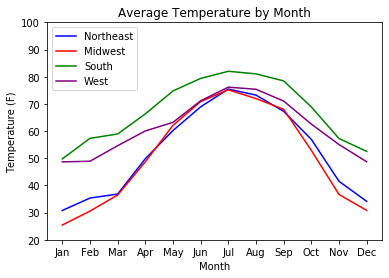

In [12]:
MW_mean_temp = r4_mean_temps.iloc[0,:]
NE_mean_temp = r4_mean_temps.iloc[1,:]
SO_mean_temp = r4_mean_temps.iloc[2,:]
WE_mean_temp = r4_mean_temps.iloc[3,:]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, NE_mean_temp, color="blue", label="Northeast")
plt.plot(months, MW_mean_temp, color="red", label="Midwest")
plt.plot(months, SO_mean_temp, color="green", label="South")
plt.plot(months, WE_mean_temp, color="purple", label="West")
plt.legend(loc="best")

plt.xlabel("Month")
plt.ylabel("Temperature (F)")
plt.title("Average Temperature by Month")
plt.ylim(20, 100)
plt.savefig("AvgTemp_mo.png")
plt.show()

In [13]:
r4_mean_humid = data.groupby("Region4").agg({"Jan_humid":['mean'], "Feb_humid":['mean'], "Mar_humid":['mean'],
                                      "Apr_humid":['mean'], "May_humid":['mean'], "Jun_humid":['mean'],
                                      "Jul_humid":['mean'], "Aug_humid":['mean'], "Sep_humid":['mean'],
                                      "Oct_humid":['mean'], "Nov_humid":['mean'], "Dec_humid":['mean']})
r4_mean_humid

,Jan_humid,Feb_humid,Mar_humid,Apr_humid,May_humid,Jun_humid,Jul_humid,Aug_humid,Sep_humid,Oct_humid,Nov_humid,Dec_humid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region4,,,,,,,,,,,,
Midwest,74.998564,72.465304,66.165912,64.681878,68.300718,68.209171,70.087735,72.818398,73.530221,72.242762,72.540387,74.463923
Northeast,65.386556,66.040000,57.907444,64.641333,69.191556,67.409222,69.326000,71.707778,73.877333,73.396556,66.479667,67.225000
South,68.537326,72.863297,63.621502,66.876374,70.950769,73.117766,71.816630,73.985971,73.715421,73.291465,72.876190,72.368755
West,68.322118,64.764271,61.661944,56.590660,59.167847,53.846632,53.966458,55.333958,55.528160,52.151632,59.172431,62.130417


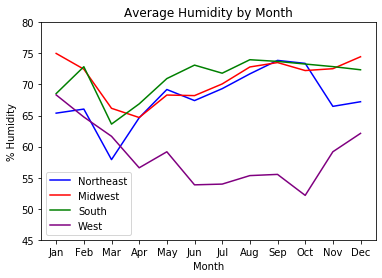

In [14]:
MW_mean_humid = r4_mean_humid.iloc[0,:]
NE_mean_humid = r4_mean_humid.iloc[1,:]
SO_mean_humid = r4_mean_humid.iloc[2,:]
WE_mean_humid = r4_mean_humid.iloc[3,:]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, NE_mean_humid, color="blue", label="Northeast")
plt.plot(months, MW_mean_humid, color="red", label="Midwest")
plt.plot(months, SO_mean_humid, color="green", label="South")
plt.plot(months, WE_mean_humid, color="purple", label="West")
plt.legend(loc="best")

plt.xlabel("Month")
plt.ylabel("% Humidity")
plt.title("Average Humidity by Month")
plt.ylim(45, 80)
plt.savefig("AvgHumid_mo.png")
plt.show()

In [15]:
r4_mean_precip = data.groupby("Region4").agg({"Jan_precip":['mean'], "Feb_precip":['mean'], "Mar_precip":['mean'],
                                      "Apr_precip":['mean'], "May_precip":['mean'], "Jun_precip":['mean'],
                                      "Jul_precip":['mean'], "Aug_precip":['mean'], "Sep_precip":['mean'],
                                      "Oct_precip":['mean'], "Nov_precip":['mean'], "Dec_precip":['mean']})
r4_mean_precip

,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,Jul_precip,Aug_precip,Sep_precip,Oct_precip,Nov_precip,Dec_precip
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region4,,,,,,,,,,,,
Midwest,1.886740,2.370718,2.678453,3.836464,5.395580,4.740884,4.012707,4.325967,3.671271,4.744199,2.183425,1.776243
Northeast,3.721111,3.188889,3.425556,4.911111,4.535556,4.314444,4.963333,4.118889,3.781111,5.267778,3.954444,4.090000
South,3.194872,3.378022,2.768132,4.314286,5.418315,6.371795,5.080952,6.617216,4.845421,5.277656,2.904762,4.631868
West,3.554514,2.823958,1.814931,0.870139,0.879167,0.245486,0.440972,0.329167,0.399306,1.667708,1.429167,1.623958


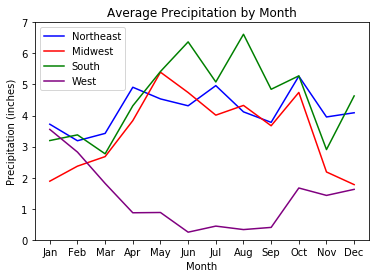

In [16]:
MW_mean_precip = r4_mean_precip.iloc[0,:]
NE_mean_precip = r4_mean_precip.iloc[1,:]
SO_mean_precip = r4_mean_precip.iloc[2,:]
WE_mean_precip = r4_mean_precip.iloc[3,:]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, NE_mean_precip, color="blue", label="Northeast")
plt.plot(months, MW_mean_precip, color="red", label="Midwest")
plt.plot(months, SO_mean_precip, color="green", label="South")
plt.plot(months, WE_mean_precip, color="purple", label="West")
plt.legend(loc="best")

plt.xlabel("Month")
plt.ylabel("Precipitation (inches)")
plt.title("Average Precipitation by Month")
plt.ylim(0, 7)
plt.savefig("AvgPrecip_mo.png")
plt.show()

In [17]:
r4_mean_cloud = data.groupby("Region4").agg({"Jan_cloud":['mean'], "Feb_cloud":['mean'], "Mar_cloud":['mean'],
                                      "Apr_cloud":['mean'], "May_cloud":['mean'], "Jun_cloud":['mean'],
                                      "Jul_cloud":['mean'], "Aug_cloud":['mean'], "Sep_cloud":['mean'],
                                      "Oct_cloud":['mean'], "Nov_cloud":['mean'], "Dec_cloud":['mean']})
r4_mean_cloud

,Jan_cloud,Feb_cloud,Mar_cloud,Apr_cloud,May_cloud,Jun_cloud,Jul_cloud,Aug_cloud,Sep_cloud,Oct_cloud,Nov_cloud,Dec_cloud
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Region4,,,,,,,,,,,,
Midwest,57.102762,51.408287,49.693370,48.350829,48.165193,40.676243,32.582873,38.711050,38.507182,49.126519,56.446409,53.645856
Northeast,46.596667,40.053333,39.820000,45.057778,50.622222,40.914444,34.837778,36.943333,39.840000,44.262222,43.514444,44.681111
South,41.119414,45.184249,37.706227,36.331136,39.085348,37.457143,31.127839,34.467399,33.759707,36.202198,38.985714,41.909890
West,38.663889,38.877431,34.876389,31.414931,38.286111,27.862847,22.702431,22.663889,24.030556,20.884722,28.805556,31.078125


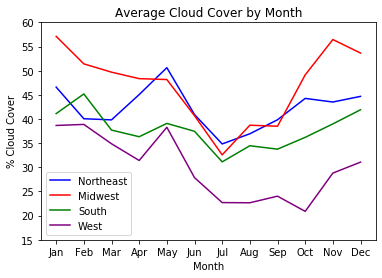

In [18]:
MW_mean_cloud = r4_mean_cloud.iloc[0,:]
NE_mean_cloud = r4_mean_cloud.iloc[1,:]
SO_mean_cloud = r4_mean_cloud.iloc[2,:]
WE_mean_cloud = r4_mean_cloud.iloc[3,:]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, NE_mean_cloud, color="blue", label="Northeast")
plt.plot(months, MW_mean_cloud, color="red", label="Midwest")
plt.plot(months, SO_mean_cloud, color="green", label="South")
plt.plot(months, WE_mean_cloud, color="purple", label="West")
plt.legend(loc="best")

plt.xlabel("Month")
plt.ylabel("% Cloud Cover")
plt.title("Average Cloud Cover by Month")
plt.ylim(15, 60)
plt.savefig("AvgCloud_mo.png")
plt.show()

In [19]:
#Correlations - Midwest Region
print("In the Midwest Region:")
print("------------------------")
MW_st_corr = st.pearsonr(MW_sums, MW_mean_temp)
print(f"The correlation between home sales and temperature is {round(MW_st_corr[0],2)}")
MW_sh_corr = st.pearsonr(MW_sums, MW_mean_humid)
print(f"The correlation between home sales and humidity is {round(MW_sh_corr[0],2)}")
MW_sp_corr = st.pearsonr(MW_sums, MW_mean_precip)
print(f"The correlation between home sales and precipitation is {round(MW_sp_corr[0],2)}")
MW_sc_corr = st.pearsonr(MW_sums, MW_mean_cloud)
print(f"The correlation between home sales and cloud cover is {round(MW_sc_corr[0],2)}")

In the Midwest Region:
------------------------
The correlation between home sales and temperature is 0.91
The correlation between home sales and humidity is -0.35
The correlation between home sales and precipitation is 0.85
The correlation between home sales and cloud cover is -0.75


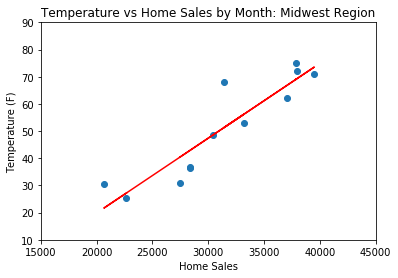

The r-squared is: 0.8334155614093547


In [20]:
#Scatter Plot:  temperature vs home sales in Midwest Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(MW_sums, MW_mean_temp)
regress_values = MW_sums * slope + intercept

plt.scatter(MW_sums,MW_mean_temp)
plt.plot(MW_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Home Sales by Month: Midwest Region")
plt.savefig("MW_Temp_Sales.png")
plt.xlim(15000,45000)
plt.ylim(10, 90)
plt.show()
print(f"The r-squared is: {rvalue**2}")

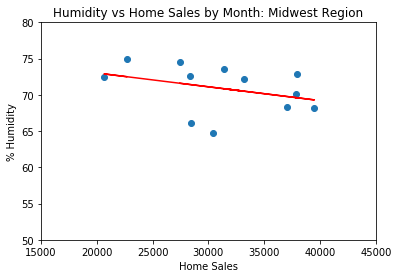

The r-squared is: 0.1212329841630283


In [21]:
#Scatter Plot:  humidity vs home sales in Midwest Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(MW_sums, MW_mean_humid)
regress_values = MW_sums * slope + intercept

plt.scatter(MW_sums,MW_mean_humid)
plt.plot(MW_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Humidity")
plt.title("Humidity vs Home Sales by Month: Midwest Region")
plt.savefig("MW_Humid_Sales.png")
plt.xlim(15000,45000)
plt.ylim(50, 80)
plt.show()
print(f"The r-squared is: {rvalue**2}")

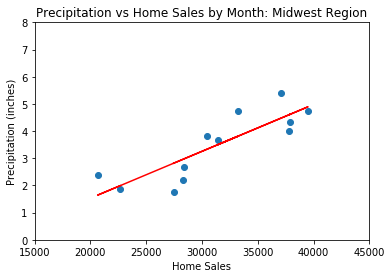

The r-squared is: 0.717747453368413


In [22]:
#Scatter Plot:  precip vs home sales in Midwest Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(MW_sums, MW_mean_precip)
regress_values = MW_sums * slope + intercept

plt.scatter(MW_sums,MW_mean_precip)
plt.plot(MW_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation vs Home Sales by Month: Midwest Region")
plt.savefig("MW_Precip_Sales.png")
plt.xlim(15000,45000)
plt.ylim(0, 8)
plt.show()
print(f"The r-squared is: {rvalue**2}")

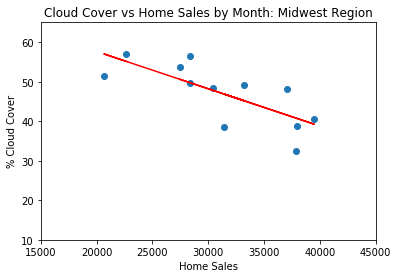

The r-squared is: 0.5550737145036093


In [23]:
#Scatter Plot:  cloud cover vs home sales in Midwest Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(MW_sums, MW_mean_cloud)
regress_values = MW_sums * slope + intercept

plt.scatter(MW_sums,MW_mean_cloud)
plt.plot(MW_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Cloud Cover")
plt.title("Cloud Cover vs Home Sales by Month: Midwest Region")
plt.savefig("MW_Cloud_Sales.png")
plt.xlim(15000,45000)
plt.ylim(10, 65)
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [24]:
#Correlations - Northeast Region
print("In the Northeast Region:")
print("------------------------")
NE_st_corr = st.pearsonr(NE_sums, NE_mean_temp)
print(f"The correlation between home sales and temperature is {round(NE_st_corr[0],2)}")
NE_sh_corr = st.pearsonr(NE_sums, NE_mean_humid)
print(f"The correlation between home sales and humidity is {round(NE_sh_corr[0],2)}")
NE_sp_corr = st.pearsonr(NE_sums, NE_mean_precip)
print(f"The correlation between home sales and precipitation is {round(NE_sp_corr[0],2)}")
NE_sc_corr = st.pearsonr(NE_sums, NE_mean_cloud)
print(f"The correlation between home sales and cloud cover is {round(NE_sc_corr[0],2)}")

In the Northeast Region:
------------------------
The correlation between home sales and temperature is 0.85
The correlation between home sales and humidity is 0.52
The correlation between home sales and precipitation is 0.61
The correlation between home sales and cloud cover is -0.26


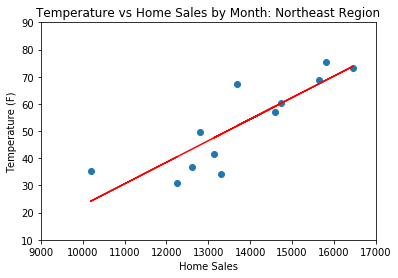

The r-squared is: 0.7237270108885195


In [25]:
#Scatter Plot:  temperature vs home sales in Northeast Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(NE_sums, NE_mean_temp)
regress_values = NE_sums * slope + intercept

plt.scatter(NE_sums,NE_mean_temp)
plt.plot(NE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Home Sales by Month: Northeast Region")
plt.savefig("NE_Temp_Sales.png")
plt.xlim(9000,17000)
plt.ylim(10, 90)
plt.show()
print(f"The r-squared is: {rvalue**2}")

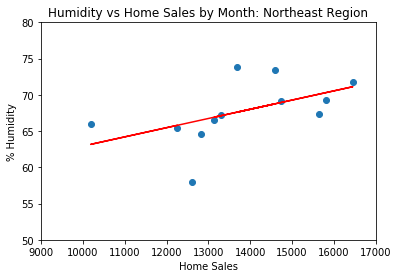

The r-squared is: 0.2697989532867582


In [26]:
#Scatter Plot:  humidity vs home sales in Northeast Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(NE_sums, NE_mean_humid)
regress_values = NE_sums * slope + intercept

plt.scatter(NE_sums,NE_mean_humid)
plt.plot(NE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Humidity")
plt.title("Humidity vs Home Sales by Month: Northeast Region")
plt.savefig("NE_Humid_Sales.png")
plt.xlim(9000,17000)
plt.ylim(50, 80)
plt.show()
print(f"The r-squared is: {rvalue**2}")

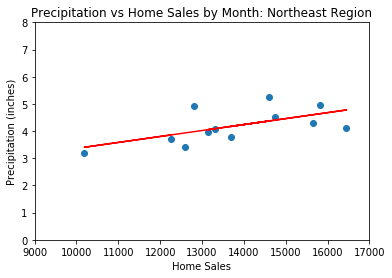

The r-squared is: 0.3725953448279034


In [27]:
#Scatter Plot:  precip vs home sales in Northeast Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(NE_sums, NE_mean_precip)
regress_values = NE_sums * slope + intercept

plt.scatter(NE_sums,NE_mean_precip)
plt.plot(NE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation vs Home Sales by Month: Northeast Region")
plt.savefig("NE_Precip_Sales.png")
plt.xlim(9000,17000)
plt.ylim(0, 8)
plt.show()
print(f"The r-squared is: {rvalue**2}")

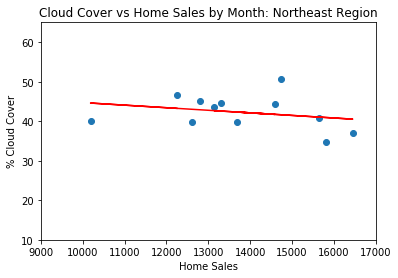

The r-squared is: 0.06949222834849196


In [28]:
#Scatter Plot:  cloud cover vs home sales in Northeast Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(NE_sums, NE_mean_cloud)
regress_values = NE_sums * slope + intercept

plt.scatter(NE_sums,NE_mean_cloud)
plt.plot(NE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Cloud Cover")
plt.title("Cloud Cover vs Home Sales by Month: Northeast Region")
plt.savefig("NE_Cloud_Sales.png")
plt.xlim(9000,17000)
plt.ylim(10, 65)
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [29]:
#Correlations - South Region
print("In the South Region:")
print("------------------------")
SO_st_corr = st.pearsonr(SO_sums, SO_mean_temp)
print(f"The correlation between home sales and temperature is {round(SO_st_corr[0],2)}")
SO_sh_corr = st.pearsonr(SO_sums, SO_mean_humid)
print(f"The correlation between home sales and humidity is {round(SO_sh_corr[0],2)}")
SO_sp_corr = st.pearsonr(SO_sums, SO_mean_precip)
print(f"The correlation between home sales and precipitation is {round(SO_sp_corr[0],2)}")
SO_sc_corr = st.pearsonr(SO_sums, SO_mean_cloud)
print(f"The correlation between home sales and cloud cover is {round(SO_sc_corr[0],2)}")

In the South Region:
------------------------
The correlation between home sales and temperature is 0.78
The correlation between home sales and humidity is 0.02
The correlation between home sales and precipitation is 0.73
The correlation between home sales and cloud cover is -0.61


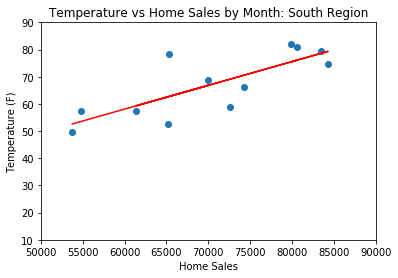

The r-squared is: 0.6148376335761211


In [30]:
#Scatter Plot:  temperature vs home sales in South Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(SO_sums, SO_mean_temp)
regress_values = SO_sums * slope + intercept

plt.scatter(SO_sums,SO_mean_temp)
plt.plot(SO_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Home Sales by Month: South Region")
plt.savefig("SO_Temp_Sales.png")
plt.xlim(50000,90000)
plt.ylim(10, 90)
plt.show()
print(f"The r-squared is: {rvalue**2}")

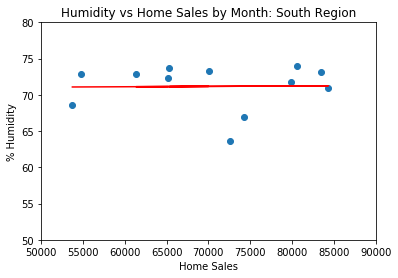

The r-squared is: 0.0002777975725454443


In [31]:
#Scatter Plot:  humidity vs home sales in South Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(SO_sums, SO_mean_humid)
regress_values = SO_sums * slope + intercept

plt.scatter(SO_sums,SO_mean_humid)
plt.plot(SO_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Humidity")
plt.title("Humidity vs Home Sales by Month: South Region")
plt.savefig("SO_Humid_Sales.png")
plt.xlim(50000,90000)
plt.ylim(50, 80)
plt.show()
print(f"The r-squared is: {rvalue**2}")

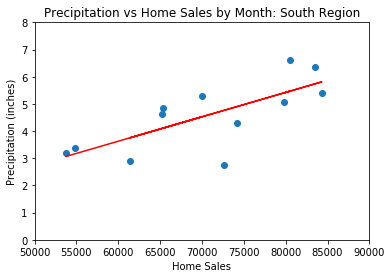

The r-squared is: 0.5399633712522812


In [32]:
#Scatter Plot:  precip vs home sales in South Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(SO_sums, SO_mean_precip)
regress_values = SO_sums * slope + intercept

plt.scatter(SO_sums,SO_mean_precip)
plt.plot(SO_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation vs Home Sales by Month: South Region")
plt.savefig("SO_Precip_Sales.png")
plt.xlim(50000,90000)
plt.ylim(0, 8)
plt.show()
print(f"The r-squared is: {rvalue**2}")

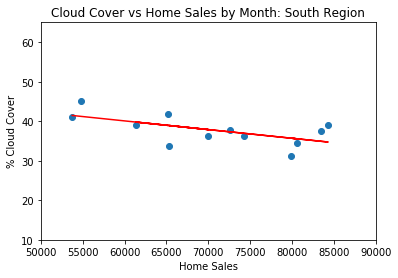

The r-squared is: 0.36675348072809766


In [33]:
#Scatter Plot:  cloud cover vs home sales in South Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(SO_sums, SO_mean_cloud)
regress_values = SO_sums * slope + intercept

plt.scatter(SO_sums,SO_mean_cloud)
plt.plot(SO_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Cloud Cover")
plt.title("Cloud Cover vs Home Sales by Month: South Region")
plt.savefig("SO_Cloud_Sales.png")
plt.xlim(50000,90000)
plt.ylim(10, 65)
plt.show()
print(f"The r-squared is: {rvalue**2}")

In [34]:
#Correlations - West Region
print("In the West Region:")
print("------------------------")
WE_st_corr = st.pearsonr(WE_sums, WE_mean_temp)
print(f"The correlation between home sales and temperature is {round(WE_st_corr[0],2)}")
WE_sh_corr = st.pearsonr(WE_sums, WE_mean_humid)
print(f"The correlation between home sales and humidity is {round(WE_sh_corr[0],2)}")
WE_sp_corr = st.pearsonr(WE_sums, WE_mean_precip)
print(f"The correlation between home sales and precipitation is {round(WE_sp_corr[0],2)}")
WE_sc_corr = st.pearsonr(WE_sums, WE_mean_cloud)
print(f"The correlation between home sales and cloud cover is {round(WE_sc_corr[0],2)}")

In the West Region:
------------------------
The correlation between home sales and temperature is 0.81
The correlation between home sales and humidity is -0.76
The correlation between home sales and precipitation is -0.85
The correlation between home sales and cloud cover is -0.45


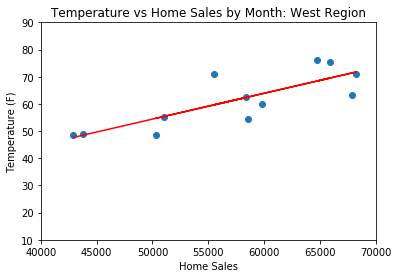

The r-squared is: 0.6540919012086404


In [35]:
#Scatter Plot:  temperature vs home sales in West Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(WE_sums, WE_mean_temp)
regress_values = WE_sums * slope + intercept

plt.scatter(WE_sums,WE_mean_temp)
plt.plot(WE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Home Sales by Month: West Region")
plt.savefig("WE_Temp_Sales.png")
plt.xlim(40000,70000)
plt.ylim(10, 90)
plt.show()
print(f"The r-squared is: {rvalue**2}")

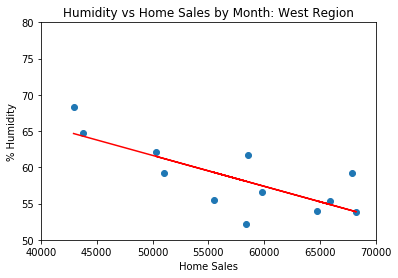

The r-squared is: 0.5835389046081093


In [36]:
#Scatter Plot:  humidity vs home sales in West Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(WE_sums, WE_mean_humid)
regress_values = WE_sums * slope + intercept

plt.scatter(WE_sums,WE_mean_humid)
plt.plot(WE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Humidity")
plt.title("Humidity vs Home Sales by Month: West Region")
plt.savefig("WE_Humid_Sales.png")
plt.xlim(40000,70000)
plt.ylim(50, 80)
plt.show()
print(f"The r-squared is: {rvalue**2}")

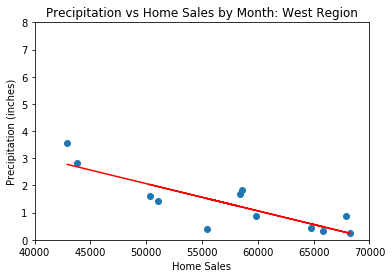

The r-squared is: 0.7184247664358012


In [37]:
#Scatter Plot:  precip vs home sales in West Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(WE_sums, WE_mean_precip)
regress_values = WE_sums * slope + intercept

plt.scatter(WE_sums,WE_mean_precip)
plt.plot(WE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation vs Home Sales by Month: West Region")
plt.savefig("WE_Precip_Sales.png")
plt.xlim(40000,70000)
plt.ylim(0, 8)
plt.show()
print(f"The r-squared is: {rvalue**2}")

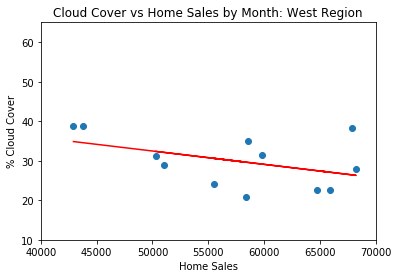

The r-squared is: 0.20131971641616753


In [38]:
#Scatter Plot:  cloud cover vs home sales in West Region

(slope, intercept, rvalue, pvalue, stderr) = linregress(WE_sums, WE_mean_cloud)
regress_values = WE_sums * slope + intercept

plt.scatter(WE_sums,WE_mean_cloud)
plt.plot(WE_sums, regress_values, "r-")
plt.xlabel("Home Sales")
plt.ylabel("% Cloud Cover")
plt.title("Cloud Cover vs Home Sales by Month: West Region")
plt.savefig("WE_Cloud_Sales.png")
plt.xlim(40000,70000)
plt.ylim(10, 65)
plt.show()
print(f"The r-squared is: {rvalue**2}")